In [1]:
import os
os.chdir("d:/proyectos/master/k-means")
!dir

 El volumen de la unidad D es Datos
 El n£mero de serie del volumen es: 28F8-2382

 Directorio de d:\proyectos\master\k-means

03/11/2019  16:08    <DIR>          .
03/11/2019  16:08    <DIR>          ..
29/10/2019  08:43    <DIR>          .ipynb_checkpoints
25/10/2019  14:17         1.822.561 AnimacionK-means.gif
03/11/2019  16:08           290.259 k-means.ipynb
12/10/2017  04:56            70.124 xclara.csv
               3 archivos      2.182.944 bytes
               3 dirs  278.403.715.072 bytes libres


# K-means

Let's implement our own algorithm

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)

Input Data and Shape
(3000, 2)


In [3]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


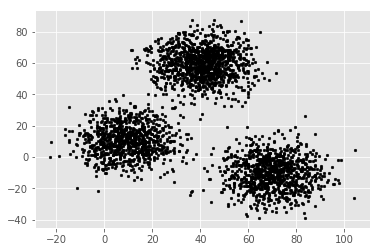

In [4]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [5]:
X.shape

(3000, 2)

In [6]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [7]:
type(X)

numpy.ndarray

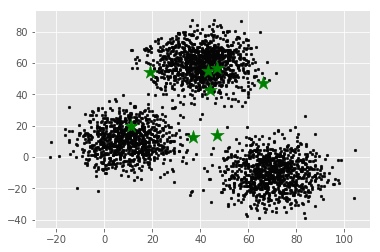

In [8]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 8
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [9]:
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
%precision 2
print(C)

Initial Centroids
[[44. 43.]
 [19. 54.]
 [47. 57.]
 [47. 14.]
 [43. 55.]
 [11. 20.]
 [66. 47.]
 [37. 13.]]


In [10]:
# X[0] has coordinates x0 and x1
print("X[0]={}".format(X[0]))

X[0]=[ 2.07 -3.24]


In [11]:
#substracting X[0] - C --> per-row substraction
z=X[0]-C
print (z)

[[-41.93 -46.24]
 [-16.93 -57.24]
 [-44.93 -60.24]
 [-44.93 -17.24]
 [-40.93 -58.24]
 [ -8.93 -23.24]
 [-63.93 -50.24]
 [-34.93 -16.24]]


Numpy lineal algebra library has a norm fucntion: np.linalg.norm

By default computes the Frobenius or 2-norm --> $\sqrt{\sum_i a_i^2}$

If axis=0 it accumulates column-wise, if axis=1 row-wise. More information [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html)

Since, z has already substracted the coordinates of X[0] and C, the 2-norm is equivalent to the euclidean distance from X[0] to each centroid --> $\sqrt{(X[0]_x - C[0]_x)^2 + (X[0]_y - C[0]_y)^2 }$

In [12]:
yy=np.linalg.norm(z, axis=1)
# yy contains the distance to cluster 0, 1 and 2:
yy

array([62.42, 59.69, 75.15, 48.12, 71.18, 24.9 , 81.31, 38.52])

In [13]:
print(np.sqrt(z[0][0]**2 + z[0][1]**2))

62.41972785350216


In [14]:
# X[0] should belong to the closest cluster, returned by argmin
cluster=np.argmin(yy)
cluster

5

In [15]:
def myKmeans(X,k):
    def dist(a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)

    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(X)-20, size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(X)-20, size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Labels(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    numIters=0;
    while error != 0:
        numIters+=1
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    return C,clusters,numIters

IndexError: list index out of range

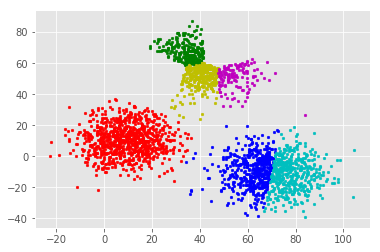

In [16]:
C,clusters,numit=myKmeans(X,len(C))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
print(C)
print(numit)

# With scikit-learn

In [ ]:
from sklearn.cluster import KMeans

def sklearnKmeans(X,k):
    # Number of clusters
    kmeans = KMeans(n_clusters=len(C))
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    # Centroid values
    centroids = kmeans.cluster_centers_
    return centroids,labels

centroids,labels=sklearnKmeans(X,len(C))
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

In [ ]:
# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn
nC=len(C)

In [ ]:
%timeit C,clusters,numit=myKmeans(X,nC)

In [ ]:
%timeit C,clusters=sklearnKmeans(X,nC)

Minor optimization

In [ ]:
def myKmeans(X,k):
    def dist(a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)

    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(X)-20, size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(X)-20, size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Labels(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    numIters=0;
    while error != 0:
        numIters+=1
        points=[[] for i in range(k)] # a list of k lists
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            points[cluster].append(X[i])
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            if len(points[i])>0:
                C[i] = np.mean(points[i], axis=0)
        error = dist(C, C_old, None)
    return C,clusters,numIters

In [ ]:
timeit C,clusters,numit=myKmeans(X,nC)

In [ ]:
C

# The C++ version!!

In [ ]:
%%writefile kmeans.cpp
#include <algorithm>
#include <cassert>
#include <chrono>
#include <cstdlib>
#include <fstream>
#include <iostream>
#include <limits>
#include <random>
#include <sstream>
#include <vector>
#include <math.h>

struct Point {
  float x{0}, y{0};
};

using DataFrame = std::vector<Point>;

float square(float value) {
  return value * value;
}

float l2_distance(Point first, Point second) {
  return sqrt(square(first.x - second.x) + square(first.y - second.y));
}

DataFrame k_means(const DataFrame& data, std::vector<size_t>& labels, size_t k) {
  float precission = 10e-10;
  static std::random_device seed;
  static std::mt19937 random_number_generator(seed());
  std::uniform_int_distribution<size_t> indices(0, data.size() - 1);

  // Pick centroids as random points from the dataset.
  DataFrame C(k);
  for (auto& cluster : C) {
    cluster = data[indices(random_number_generator)];
  }

  double error;
  do {
    // Find assignments.
    // and sum up and count points for each cluster.
    DataFrame new_C(k);
    std::vector<size_t> counts(k, 0);
    for (size_t point = 0; point < data.size(); ++point) {
      auto best_distance = std::numeric_limits<float>::max();
      size_t best_cluster = 0;
      for (size_t cluster = 0; cluster < k; ++cluster) {
        const float distance = l2_distance(data[point], C[cluster]);
        if (distance < best_distance) {
          best_distance = distance;
          best_cluster = cluster;
        }
      }
      labels[point] = best_cluster;
      new_C[best_cluster].x += data[point].x;
      new_C[best_cluster].y += data[point].y;
      counts[best_cluster] += 1;
    }

    // Divide sums by counts to get new centroids.
    for (size_t cluster = 0; cluster < k; ++cluster) {
      // Turn 0/0 into 0/1 to avoid zero division.
      const auto count = std::max<size_t>(1, counts[cluster]);
      new_C[cluster].x = new_C[cluster].x / count;
      new_C[cluster].y = new_C[cluster].y / count;
    }

    error=0;
    for (size_t cluster = 0; cluster < k; ++cluster) {
      error+=fabs(l2_distance(C[cluster],new_C[cluster]));
      C[cluster] = new_C[cluster];
    }
  } while(error>precission);

  return C;
}

int main(int argc, const char* argv[]) {
  if (argc < 3) {
    std::cerr << "usage: "<< argv[0] << " <data-file> <k> [runs]"
              << std::endl;
    std::exit(EXIT_FAILURE);
  }

  const auto k = std::atoi(argv[2]);
  const auto number_of_runs = (argc >= 4) ? std::atoi(argv[3]) : 10;

  DataFrame data;
  std::ifstream stream(argv[1]);
  if (!stream) {
    std::cerr << "Could not open file: " << argv[1] << std::endl;
    std::exit(EXIT_FAILURE);
  }
  std::string line;
  char comma = 'z';
  //Skip the header
  std::getline(stream, line);
  //Parse the reset of the file
  while (std::getline(stream, line)) {
    Point point;
    std::istringstream line_stream(line);
    line_stream >> point.x >> comma >> point.y ;
    //std::cout << point.x << " " <<point.y <<std::endl;
    data.push_back(point);
  }

  DataFrame means;
  std::vector<size_t> labels(data.size());
  double total_elapsed = 0;
  for (int run = 0; run < number_of_runs; ++run) {
    const auto start = std::chrono::high_resolution_clock::now();
    means = k_means(data, labels, k);
    const auto end = std::chrono::high_resolution_clock::now();
    const auto duration =
        std::chrono::duration_cast<std::chrono::duration<double,std::milli>>(end - start);
    total_elapsed += duration.count();
  }
  std::cerr << "Took: " << total_elapsed / number_of_runs << "ms ("
            << number_of_runs << " runs)" << std::endl;

  for (auto& mean : means) {
    std::cout << mean.x << " " << mean.y << std::endl;
  }
}

In [17]:
!g++ kmeans.cpp -o kmeans -O3 -std=c++11

"g++" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!./kmeans

In [ ]:
!./kmeans xclara.csv 3 100

In [ ]:
speedup=17.7/0.14
speedup

### Challenge: Wrap C++ function kmeans inside a new "MyKMeans" extension module

In [ ]:
%%writefile _cppkmeans.h
//Write your header file here...


In [ ]:
%%writefile _cppkmeans.cpp
//Write your C++ function here



In [ ]:
%%writefile cppkmeans.pyx
# Put yor wrapper here


In [ ]:
%%writefile wrap_kmeans.py
# Put the code of the python wrapper here

In [ ]:
# Build the extension module

In [ ]:
# Import the extension module and use it

In [ ]:
# Plot the image to validate the solution

In [ ]:
# Time the function 